# Homework 5 Part 2

**Due: Monday, November 20, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

# Problem 5

A surveillance camera periodically checks a certain area and records a signal $X=W$ if there is no intruder (this is the null hypothesis $H_0$). If there is an intruder the signal is $X=\theta+W$, where $\theta$ is unknown with $\theta>0$. We assume that $W$ is a normal random variable with mean 0 and known variance $v=0.6$.

(a) We obtain a single signal value $X=0.86$. Should $H_0$ be rejected at the 5% level of significance?

(b) We obtain five independent signal values $X=0.93, -0.36, 0.89, 0.42, -0.27$. Should $H_0$ be rejected at the 5% level of significance?

(c) Repeat part (b), using a t-distribution, and assuming the variance $v$ is unknown.

In [18]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

'''
# Problem 5

A surveillance camera periodically checks a certain area and records a signal $X=W$ if there is no intruder (this is the null hypothesis $H_0$). If there is an intruder the signal is $X=\theta+W$, where $\theta$ is unknown with $\theta>0$. We assume that $W$ is a normal random variable with mean 0 and known variance $v=0.6$.

(a) We obtain a single signal value $X=0.86$. Should $H_0$ be rejected at the 5% level of significance?

(b) We obtain five independent signal values $X=0.93, -0.36, 0.89, 0.42, -0.27$. Should $H_0$ be rejected at the 5% level of significance?

(c) Repeat part (b), using a t-distribution, and assuming the variance $v$ is unknown.
'''
# Part a
mean = 0
var = 0.6
std = np.sqrt(var)

W = stats.norm(mean, std)
ci = W.interval(0.95)
print(f'The upper bound of the CI is {ci[1]:.3f}, thus we cannot reject the null hypothesis.')

# Part b
X = np.array([0.93, -0.36, 0.89, 0.42, -0.27])
print(f'None of the following values are outside the CI: {X} considering our CI is {ci}')

# Part c
W_t = stats.t((len(X)-1), loc=mean, scale=std)
W_t_ci = W_t.interval(0.95)
print(f'The new upperbound of the t distribution CI is {W_t_ci[1]:.3f}, thus we cannot reject the null hypothesis.')

The upper bound of the CI is 1.518, thus we cannot reject the null hypothesis.
None of the following values are outside the CI: [ 0.93 -0.36  0.89  0.42 -0.27] considering our CI is (-1.518181574257992, 1.518181574257992)
The new upperbound of the t distribution CI is 2.151, thus we cannot reject the null hypothesis.


# Problem 6

Leukemia is a type of cancer found in the blood and bone marrow and is caused by the rapid production of abnormal white blood cells (leukocytes). These abnormal white blood cells are not able to fight infection and impair the ability of the bone marrow to produce red blood cells and platelets.

Suppose that leukocytes cell count for people without Leukemia/cancer can be approximately modeled with a $\operatorname{Gaussian}(\mu=8, \sigma^2=5)$ and leukocytes cell count for people with Leukemia/cancer are approximately $\operatorname{Gaussian}(\mu=14, \sigma^2=6)$.

Answer the following questions:

1. (4 points) Determine the threshold $\gamma$ for the leukocytes cell count such that the probability of a miss is 5%.

In [23]:
nl_mean = 8
nl_var = 5

no_leuk = stats.norm(nl_mean, np.sqrt(nl_var))

l_mean = 14
l_var = 6

leuk = stats.norm(l_mean, np.sqrt(l_var))

leuk_ci = leuk.interval(0.95)
miss_prob = 0.05

gamma = leuk.ppf(miss_prob)
print(f'The gamma value is {gamma:.3f}')

The gamma value is 9.971


2. (4 points) What is the probability of false alarm using the threshold value $\gamma$ found in part (1).

In [24]:
prob_false_alarm = 1 - no_leuk.cdf(gamma)
print(f"The probability of a false alarm is: {prob_false_alarm:.4f}")

The probability of a false alarm is: 0.1890


3. (4 points) Compute FPR and TPR, plot the ROC curve and compute the AUC.

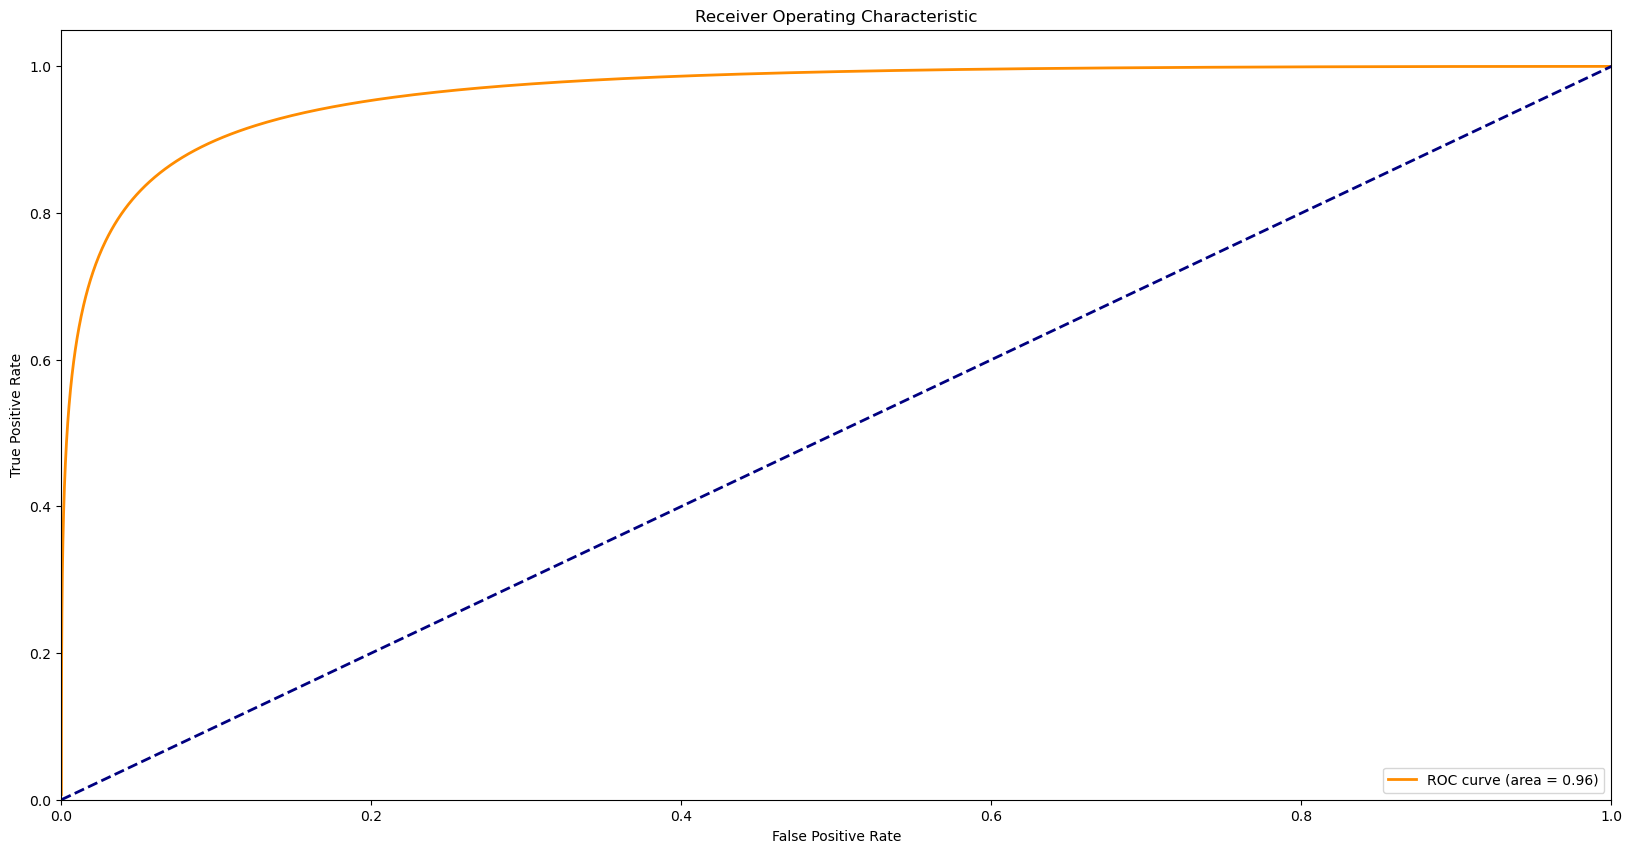

In [31]:
from sklearn.metrics import roc_curve, auc
th = np.linspace(0, 20, 1000)

FPR = [1 - no_leuk.cdf(gamma) for gamma in th]
TPR = [1 - leuk.cdf(gamma) for gamma in th]

roc_auc = auc(FPR, TPR)

# Plotting the ROC curve

plt.figure(figsize=(20, 10))
plt.plot(FPR, TPR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

4. (3 points) What is the range of value for the threshold $\gamma$ such that the FPR is less than 15%?

In [35]:
new_gamma = no_leuk.ppf(0.85)
print(f'The new lower bound gamma value is {new_gamma:.3f}, reducing the FPR to only 15%')

The new lower bound gamma value is 10.318, reducing the FPR to only 15%


# Problem 7

This problem uses the Iris dataset from the UCI ML Repository and available with ```scikit-learn```.

Let's load the data:

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris(return_X_y=False)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

This data set contains samples from 3 types of Iris plants: 0 (setosa), 1 (versicolor) and 2 (virginica):

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
df = pd.DataFrame(data=np.hstack((iris.data, iris.target[:,np.newaxis])), 
                 columns=np.hstack((iris.feature_names,'Iris Class')))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Let's consider each iris flower to be characterized by its sepal length in cm.

Answer the following questions:

1. Plot the histogram for the three types of iris flowers. Overlay the 3 histograms, add a legend and axis labels.
2. Estimate the density function for each type of iris using Kernel Density Estimation (KDE) with a Gaussian kernel.
3. In the same plot, plot the Gaussian KDE for each class along with each class histogram. Include legends and axis labels.
4. Compute the prior probability for each type of iris based on this data.
5. Find the region of values (you may use ```x=np.linspace(3.6,9,1000)```) for which MAP will decide iris class 0 (setosa), 1 (versicolor) and 2 (virginica).
6. Based on this decision rule, compute how many samples will be falsely classified as class 0 (setosa).

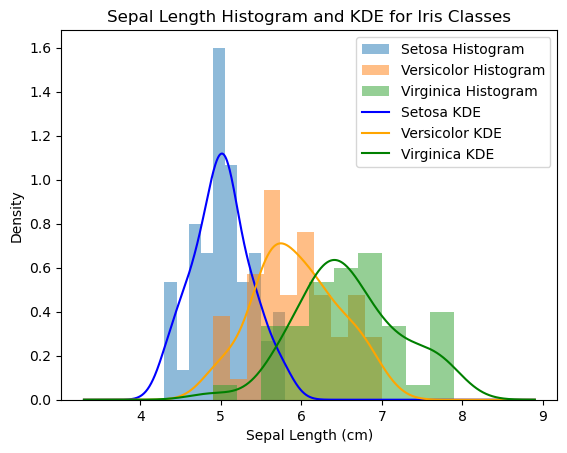

The prior probability of Setosa is 0.333, the prior probability of Versicolor is 0.333, and the prior probability of Virginica is 0.333


In [46]:
# 1-3.
# find min and max of sepal length
min_max = df['sepal length (cm)'].agg(['min', 'max'])
x = np.linspace(min_max[0]-1, min_max[1]+1, 1000)

kde_setosa = stats.gaussian_kde(df[df['Iris Class'] == 0]['sepal length (cm)'])
kde_versicolor = stats.gaussian_kde(df[df['Iris Class'] == 1]['sepal length (cm)'])
kde_virginica = stats.gaussian_kde(df[df['Iris Class'] == 2]['sepal length (cm)'])

plt.hist(df[df['Iris Class'] == 0]['sepal length (cm)'], bins=10, alpha=0.5, density=True, label='Setosa Histogram')
plt.hist(df[df['Iris Class'] == 1]['sepal length (cm)'], bins=10, alpha=0.5, density=True, label='Versicolor Histogram')
plt.hist(df[df['Iris Class'] == 2]['sepal length (cm)'], bins=10, alpha=0.5, density=True, label='Virginica Histogram')
plt.plot(x, kde_setosa(x), label='Setosa KDE',color='blue')
plt.plot(x, kde_versicolor(x), label='Versicolor KDE',color='orange')
plt.plot(x, kde_virginica(x), label='Virginica KDE',color='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.title('Sepal Length Histogram and KDE for Iris Classes')
plt.legend(loc='upper right')
plt.show()

# 4.
prior_setosa = len(df[df['Iris Class'] == 0]) / len(df)
prior_versicolor = len(df[df['Iris Class'] == 1]) / len(df)
prior_virginica = len(df[df['Iris Class'] == 2]) / len(df)

print(f'The prior probability of Setosa is {prior_setosa:.3f}, the prior probability of Versicolor is {prior_versicolor:.3f}, and the prior probability of Virginica is {prior_virginica:.3f}')

# 5. Find the region of values (you may use ```x=np.linspace(3.6,9,1000)```) for which MAP will decide iris class 0 (setosa), 1 (versicolor) and 2 (virginica).

# Problem 8

Consider the following dataset:

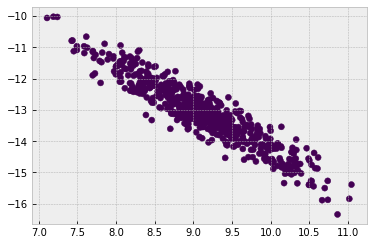

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=1)
X = np.dot(X, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]) 
plt.scatter(X[:,0],X[:,1],c=y);

Answering the following questions:

1. Compute the covariance matrix.

2. Compute the correlation coefficient using the formula.

3. Find the OLS solution using $x$ to predict $y$, what is the MSE and $R^2$ of the OLS solution?

4. Plot the fitted linear function with the orginal dataset. 

5. Performe the Null Hypothesis Tests for Correlation to decide whether the dependence between $x$ and $y$ with significance level of 95%.


___

# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment